# Checkpoint 3

Read the Checkpoint 3 description in the PDF file (Learn). Consult this PDF whenever you have doubts about what needs to be done in each task.

If you downloaded this notebook from Learn, make sure to also download the file called "signals.zip". Unzip this file in the same location as your notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pandas
from scipy.signal import argrelmax

In [2]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 14

## Data files
The cells below will read all of the data files into pandas `DataFrame` objects. The `file_dir` variable in the cell below denotes the name of the folder in which the files are stored. The folder should be in the same location as this notebook.

Each file contains an array of time values, called "t", and arrays of input signals, called "x...", and output signals, called "y...".

* `data_delta` - a delta function input signal
* `data_step` - a step function input signal
* `data_noise` - white noise input signal
* `data_sine_ampl` - multiple sine wave input signals with the same frequency, but different amplitudes
* `data_sine_freq` - multiple sine wave input signals with the same amplitude, but different frequencies
* `data_unknown` - an input signal with unknown functional form. The output signal is not given.

In [3]:
# the folder containing the data files
file_dir = 'signals'

In [4]:
data_delta     = pandas.read_csv(os.path.join(file_dir, 'delta.txt'),sep='\t')
data_step      = pandas.read_csv(os.path.join(file_dir, 'step.txt'),sep='\t')
data_noise     = pandas.read_csv(os.path.join(file_dir, 'white_noise.txt'),sep='\t')
data_sine_ampl = pandas.read_csv(os.path.join(file_dir, 'sine_different_amplitudes.txt'),sep='\t')
data_sine_freq = pandas.read_csv(os.path.join(file_dir, 'sine_different_frequencies.txt'),sep='\t')
data_unknown   = pandas.read_csv(os.path.join(file_dir, 'unknown.txt'),sep='\t')

## Task 1
Plot the filter’s response to a sine wave of angular frequency $\omega=0.5$.

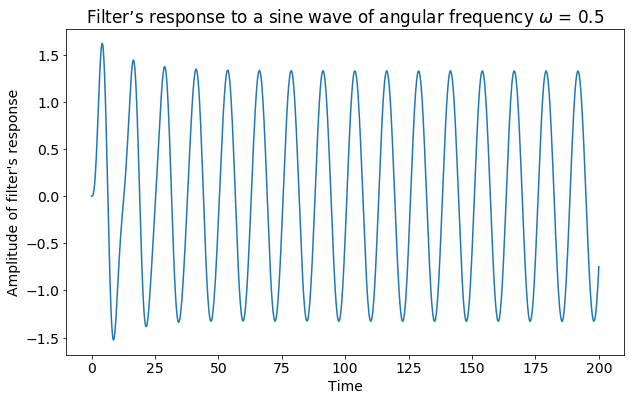

In [5]:
### TASK 1 plot
plt.plot(data_sine_freq["t"],data_sine_freq["yw0.5"])
plt.title("Filter’s response to a sine wave of angular frequency $\omega$ = 0.5")
plt.xlabel("Time")
plt.ylabel("Amplitude of filter's response")
plt.show()

## Task 2
Plot the frequency response to sine waveforms of $\omega=0,0.05,0.1,0.15,...,2.0$. This should be a single plot of $H(\omega$).

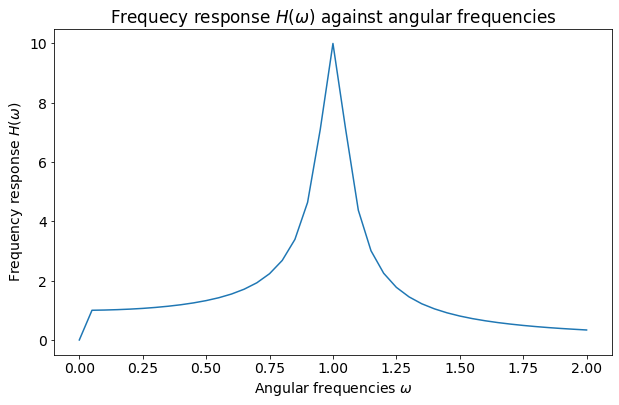

In [6]:
### TASK 2 plot
omega=np.linspace(0,2,41)
H=[]
for i in range(2,data_sine_freq.keys().size,2):
    h = data_sine_freq[data_sine_freq.keys()[i]]
    H.append(max(h[1000:]))

plt.plot(omega,H)
plt.title("Frequecy response $H(\omega)$ against angular frequencies")
plt.xlabel("Angular frequencies $\omega$")
plt.ylabel("Frequency response $H(\omega)$")
plt.show()

## Task 3
What function best approximates the amplitude of the response versus the amplitude of the input?

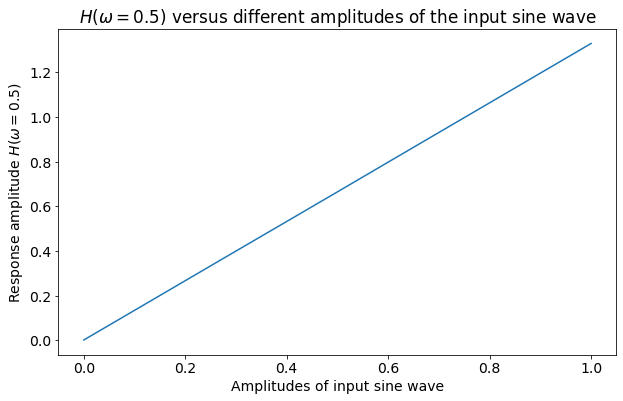

In [7]:
### TASK 3 plot
input_ampl=np.linspace(0,1,11)
output_ampl =[]

for i in range(2,data_sine_ampl.keys().size,2):
    h = data_sine_ampl[data_sine_ampl.keys()[i]]
    output_ampl.append(max(h[1000:]))

plt.plot(input_ampl,output_ampl)
plt.title("$H(\omega=0.5)$ versus different amplitudes of the input sine wave")
plt.xlabel("Amplitudes of input sine wave")
plt.ylabel("Response amplitude $H(\omega=0.5)$")
plt.show()

In [8]:
### TASK 3 function
def amplitude_response(a):
    coeff, sqres, _, _, _ = np.polyfit(input_ampl,output_ampl, 1, full=True)
    fit=coeff[0]*input_ampl+coeff[1]
    return fit

### Testing task 3
Follow these steps to test the `amplitude_response` function.
1. Create an array called `input_ampl` holding all of the input amplitude values used in the plot above.
2. Create an array called `output_ampl` holding all of the output amplitude values used in the plot above.

In [9]:
test_output = amplitude_response(input_ampl)
try:
    assert(((test_output - output_ampl)**2).sum() < 0.001)
    print ("Passed!")
except AssertionError:
    print ("Failed!")

Passed!


## Task 4
Can you get the frequency response using a single input signal and an FFT? Plot signal response from this method and compare with $H(\omega$) from Task 2.

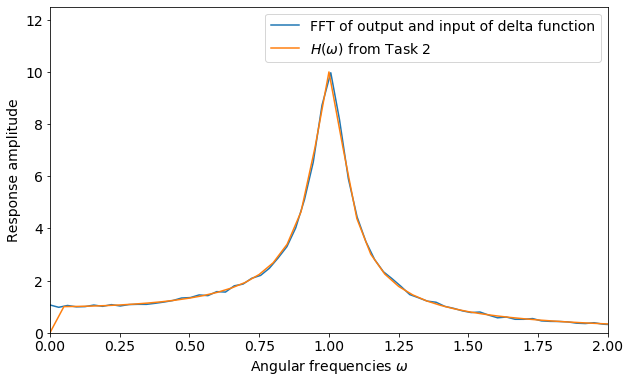

In [10]:
### TASK 4 plot
outputvals=abs(np.fft.rfft(data_delta["y"]))
inputvals=abs(np.fft.rfft(data_delta["x"]))
nn=801
t=data_delta["t"]
y=[]
for i in range(len(outputvals)):
    y.append(outputvals[i]/inputvals[i])
omega= np.linspace(0, 2*np.pi*nn/t.max(), nn)
plt.plot(omega,y, label="FFT of output and input of delta function")
w=np.linspace(0,2,41)
plt.plot(w,H, label="$H(\omega)$ from Task 2")
plt.xlim(0,2)
plt.ylim(0,25)
plt.xlabel("Angular frequencies $\omega$")
plt.ylabel("Response amplitude")
plt.ylim(0,12.5)
plt.legend()
plt.show()

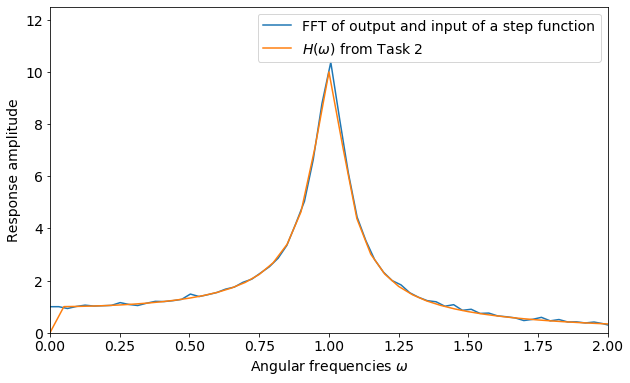

In [11]:
#TEST TO CHECK IF IT WORKS FOR OTHER FUNCTIONS

outputvals=abs(np.fft.rfft(data_step["y"]))
inputvals=abs(np.fft.rfft(data_step["x"]))
nn=801
t=data_step["t"]
y=[]
for i in range(len(outputvals)):
    y.append(outputvals[i]/inputvals[i])
omega= np.linspace(0, 2*np.pi*nn/t.max(), nn)
plt.plot(omega,y, label="FFT of output and input of a step function")
w=np.linspace(0,2,41)
plt.plot(w,H, label="$H(\omega)$ from Task 2")
plt.xlim(0,2)
plt.ylim(0,25)
plt.xlabel("Angular frequencies $\omega$")
plt.ylabel("Response amplitude")
plt.ylim(0,12.5)
plt.legend()
plt.show()

## Task 5
Predict the output response to the “unknown signal” provided using only the input-output data files provided and no information about how the filter works internally. Plot the predicted output signal for the unknown input signal.

The desired frequencies are :[0.31478758 1.00732027 2.01464054]


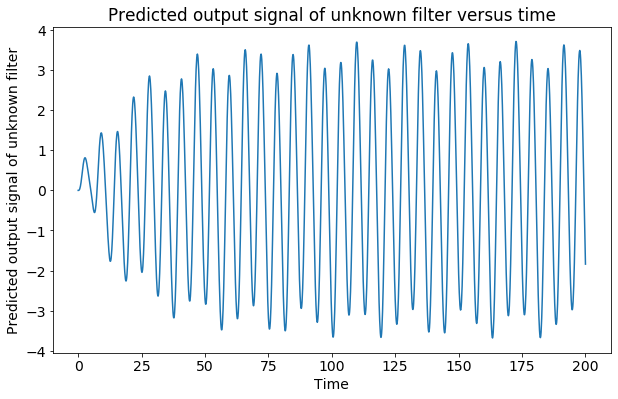

In [12]:
### TASK 5 plot

hh=abs(np.fft.rfft(data_unknown["x"]))

nn=501

ampl = np.linspace(0, 2*np.pi*nn/t.max(), nn)

frequency=ampl[argrelmax(hh)]
print("The desired frequencies are :" +str(frequency))

unknownoutput=np.array(((data_sine_freq["yw0.3"]) + np.array(data_sine_freq["yw1."]) + np.array(data_sine_freq["yw2."]))/3)
t=data_unknown["t"]

plt.plot(t,unknownoutput)
plt.title("Predicted output signal of unknown filter versus time")
plt.xlabel("Time")
plt.ylabel("Predicted output signal of unknown filter")
plt.show()

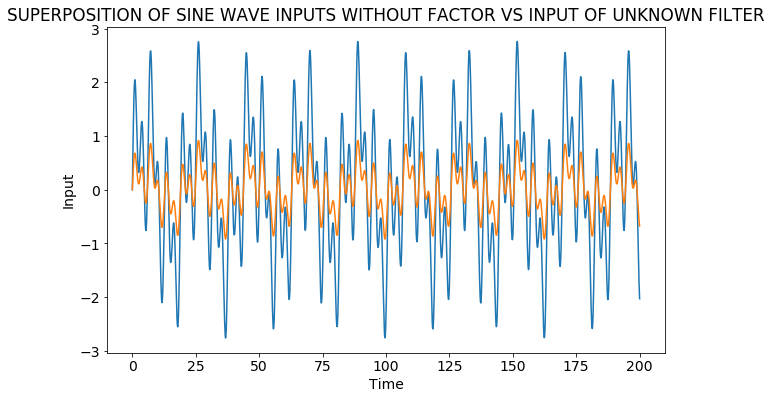

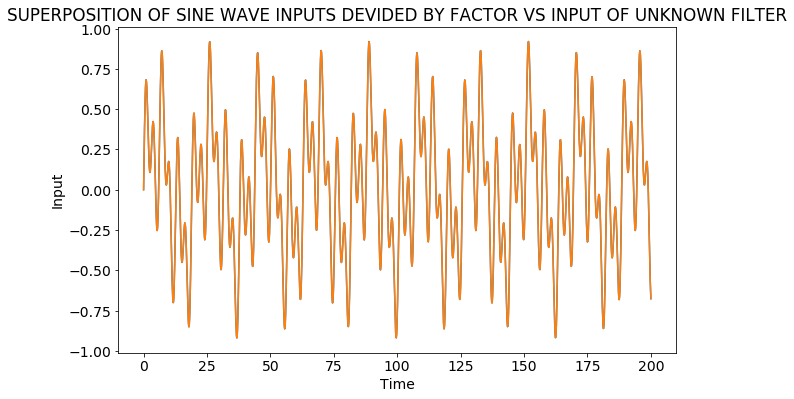

In [13]:
#PLOT USED TO GET FACTOR OF 1/3 IN SUPERPOSITION OF SINE WAVES FOR UNKNOWN FILTER OUTPUT
t=data_sine_freq["t"]
sinewaves=np.array(((data_sine_freq["xw0.3"])+np.array(data_sine_freq["xw1."])+np.array(data_sine_freq["xw2."])))
plt.plot(t,sinewaves)
plt.plot(t,data_unknown["x"])
plt.title("SUPERPOSITION OF SINE WAVE INPUTS WITHOUT FACTOR VS INPUT OF UNKNOWN FILTER")
plt.xlabel("Time")
plt.ylabel("Input")
plt.show()

#BY TRIAL AND ERROR, I IDENTIFIED THAT IF I MUTIPLY BY 1/3 THE COMBINATION OF SINEWAVES INPUTS I GET THE SAME AS THE INPUTS OF THE UNKNOWN FILTER

sinewaves=(np.array(((data_sine_freq["xw0.3"])+np.array(data_sine_freq["xw1."])+np.array(data_sine_freq["xw2."]))))/3
plt.plot(t,sinewaves)
plt.plot(t,data_unknown["x"])
plt.title("SUPERPOSITION OF SINE WAVE INPUTS DEVIDED BY FACTOR VS INPUT OF UNKNOWN FILTER")
plt.xlabel("Time")
plt.ylabel("Input")
plt.show()

## Task 6
Propose a minimum model of what is inside the black box. The model must be able to reproduce the frequency response from task 4. Hint: think about the filter as a certain recursion for {y_i} with “inhomogeneous” input {x_i}.

Create a function that takes an array `x`, representing the input signal of values equally spaced in time. The function should return an array representing the output signal.

You can demonstrate the accuracy of your function by comparing its output to some of the input/output signals provided.

In [14]:
### TASK 6 function
def black_box_filter(x):
    # Remove the line that says "raise NotImplementedError"
    # YOUR CODE HERE
    raise NotImplementedError()

In [15]:
def signal_compare(dataset, input_field='x'):
    input_data = dataset[input_field]
    output_field = 'y' + input_field[1:]
    output_data = dataset[output_field]
    bb_output = black_box_filter(input_data)
    diff = np.abs(output_data - bb_output)

    plt.plot(data_step['t'], data_step['y'], label='output', alpha=0.9)
    plt.plot(data_step['t'], black_box_filter(data_step['x']), label='black box', alpha=0.9)
    plt.legend(loc='best')
    plt.xlabel('time')
    plt.ylabel('signal')
    plt.show()

In [16]:
signal_compare(data_step)

NotImplementedError: 

Feel free to add more cells that call `signal_compare` with different data.